## Hydraulic Gradient visualised using Darcy Law

### How to use the tool?

1. Go to the Collab / Live Code  by clicking the rocket button (top-right of the page)
2. Execute the code cell
3. Change the values or add diffrent matterial and see how there is a change in Hydraulic Head as the Parameters _L, K, d_ change, to simulate the calculation press the **run interact**.
4. For re-simulations - changes the input values in the boxes and click the "**run interact**" button. 

This tool can also be downloaded and run locally. For that download the [**_Darcy Gradient_**](https://github.com/iGW-TU-Dresden/iGW_Book/blob/main/content/tools/effective_K.ipynb) file from the book GitHub site, and execute the process in any editor (e.g., JUPYTER notebook, JUPYTER lab) that is able to read and execute this file-type.

The codes are licensed under CC by 4.0 [(use anyways, but acknowledge the original work)](https://creativecommons.org/licenses/by/4.0/deed.en)s

#### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import ipywidgets as widgets
from IPython.display import display

#### Calculating Functions

In [2]:
def calculate_hydraulic_gradient(flow_rate, area, K):
    """
    Calculate the hydraulic gradient (i) based on the flow rate, cross-sectional area, and K value.
    """
    return flow_rate / (K * area)


#### Plotting Functions

In [3]:


def normalized_plotter(x_points, y_values):
    total = sum(y_values)
    percentages = [value / total for value in y_values]

    # Initialize the y-coordinates with the first value as 1
    y_coords = [1]

    # Calculate subsequent y-values as 1 - percentage
    for percentage in percentages:
        y_coords.append(y_coords[-1] - percentage)

    return y_coords

def plot_pipe_system(lengths, elevation_changes, diameters, materials, material_properties):
    """
    Plot the connected pipe system with rectangles of different widths in 2D.

    Parameters:
        lengths (list of floats): Length of each section of the pipe (in meters).
        elevation_changes (list of floats): Elevation change for each section of the pipe (in meters).
        diameters (list of floats): Diameter of each section of the pipe (in meters).
        materials (list of strings): Pipe material for each section (matching the keys in the material_properties dictionary).
        material_properties (dict): Material properties dictionary with K values, colors, and hatch patterns for different pipe materials.
    """
    # Calculate the number of sections in the pipe system
    num_sections = len(lengths)
    section_end_points = [0]
    hyd_head=[]
    hyd_grad=[]

    # Initialize the plot with a default figure size
    fig, ax = plt.subplots(figsize=(12, 6))

    # Initialize variables for the connected pipe system
    x_position = 0
    y_position = 0
    initial_head = 100  # Initial hydraulic head

    # Plot each section of the pipe system with rectangles of different widths and custom colors
    for i in range(num_sections):
        # Get the material properties for the current section
        material = materials[i]
        K_value = material_properties[material]['K']
        section_color = material_properties[material]['color']
        section_hatch = material_properties[material]['hatch']

        # Calculate the cross-sectional area of flow (A) in the pipe
        area = (np.pi / 4) * diameters[i] ** 2

        # Calculate the hydraulic gradient (i) using the equation Q = K * A * i
        flow_rate = 0.01  # For demonstration purposes, using a fixed flow rate of 0.1 m^3/s
        hydraulic_gradient = calculate_hydraulic_gradient(flow_rate, area, K_value)
        hyd_grad.append(hydraulic_gradient)

        # Calculate the change in hydraulic head (delta h) for the section
        delta_h = hydraulic_gradient * lengths[i]
        hyd_head.append(delta_h)
        # Add the rectangle representing the section and fill it with the custom color and hatch pattern
        rect = Rectangle((x_position, y_position), lengths[i], diameters[i], linewidth=1, edgecolor='black', facecolor=section_color, hatch=section_hatch)
        ax.add_patch(rect)

        # Add the label for the section with better offset for label positioning
        label = f"Section {i+1}\nLength: {lengths[i]} m\nDiameter: {diameters[i]:.2f} m\nMaterial: {material} \nGradient: {hydraulic_gradient:.2f}\nDelta h: {delta_h:.2f}"
        ax.annotate(label, xy=(x_position + lengths[i] / 2, -1),
                    xytext=(5, 5), textcoords="offset points", ha='left', va='bottom', fontsize=10, color='black')

        # Update x and y positions for the next section
        x_position += lengths[i]
        y_position += elevation_changes[i]
        section_end_points.append(x_position)


    ### Call function to normalise Hydraulic Head and Grad
    h_plot_cord = normalized_plotter(section_end_points,hyd_head)

    rect_height = 1  # Add some buffer for better visualization

    ### Plottting assist variables


    diameters2 = diameters + [diameters[-1]]
    i=0
    prev_x_start_inner = None
    prev_y_start = None
    for x_start, y_start in zip(section_end_points, h_plot_cord):


        x_start_inner = x_start + (max(lengths) / 1000)
        x_end = x_start + (max(lengths) / 100)
        x_end_inner = x_start + (max(lengths) / 90)

        # Create and add the rectangle patch
        rect = Rectangle((x_start, y_position + min(diameters) / 2), x_end - x_start, rect_height,
                         linewidth=1, edgecolor='black', facecolor='none')
        plt.gca().add_patch(rect)

        rect2 = Rectangle((x_start_inner, y_position+diameters2[i]), x_end_inner - x_start_inner,y_start-diameters2[i],
                      linewidth=1, edgecolor='blue', facecolor='blue')
        plt.gca().add_patch(rect2)

        if prev_x_start_inner is not None and prev_y_start is not None:
        # Add a dotted line between the previous and current coordinates
            plt.plot([prev_x_start_inner, x_start_inner], [prev_y_start, y_start], 'k:', linewidth=1)

        prev_x_start_inner = x_start_inner
        prev_y_start = y_start

        i=i+1



    # Set plot labels and title
    plt.xlabel("Section Length (m)")
    plt.ylabel("Section Elevation (m)")
    plt.title("Hydraulic Gradient Visualised")
    plt.grid(False)

    # Add an arrow indicating the direction of flow at the start of the system (pointing to the right)

    ax.arrow(section_end_points[0]-min(lengths)/2, 0, min(lengths)/4, 0, head_width=0.1, head_length=min(lengths)/8, fc='black', ec='black')
    label = "Q"
    ax.annotate(label, xy=(section_end_points[0]-min(lengths)/4, 0.1), fontsize=15)

    # Adjust the axis limits to zoom out the plot and provide some extra space
    #plt.xlim(section_end_points[0]-50, x_position + 20)  # Adding extra space of 20 units on each side of the x-axis
    plt.ylim(-1, max(1, y_position) + 1)  # Adjusting the y-axis limits to include all elevations

    plt.tight_layout()  # Improve layout to prevent overlapping labels
    plt.show()

#### Data Entry Widgets 

_Run the Cell below and change the values as you wish_

**To add more sections edit the num_sections variable down**

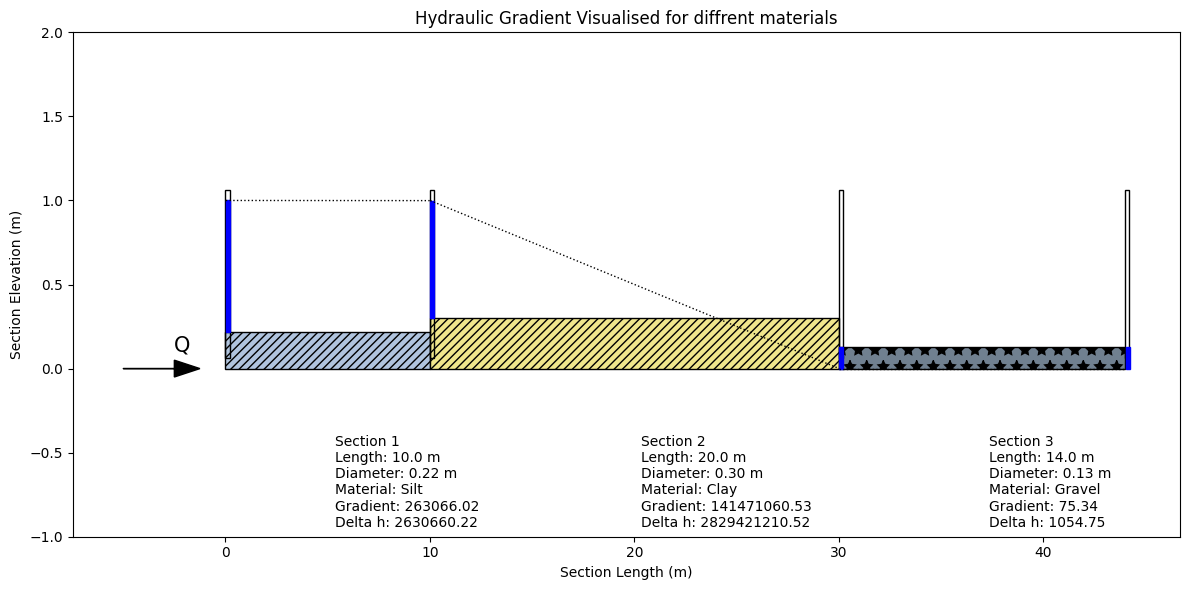

In [5]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Initialize empty lists to store data
lengths = []
diameters = []
materials = []

def run_interact(num_sections):
    global lengths, diameters, materials

    lengths_sliders = [widgets.FloatText(value=10, description=f'Length {i+1} (m)') for i in range(num_sections)]
    diameters_sliders = [widgets.FloatSlider(min=0.1, max=1.0, step=0.01, description=f'Diameter {i+1} (m)') for i in range(num_sections)]
    materials_dropdowns = [widgets.Dropdown(options=['Gravel','Silt','Clay','Coarse sand','Medium sand', 'Fine sand'], description=f'Material {i+1}') for i in range(num_sections)]

    def update_data(change):
        global lengths, diameters, materials
        lengths = [slider.value for slider in lengths_sliders]
        diameters = [slider.value for slider in diameters_sliders]
        materials = [dropdown.value for dropdown in materials_dropdowns]

    for slider in lengths_sliders:
        slider.observe(update_data, 'value')

    for slider in diameters_sliders:
        slider.observe(update_data, 'value')

    for dropdown in materials_dropdowns:
        dropdown.observe(update_data, 'value')

    run_button = widgets.Button(description='Run Interact')

    def on_run_button_clicked(b):
        clear_output(wait=True)
        display(widgets.VBox(lengths_sliders + diameters_sliders + materials_dropdowns + [run_button]))

        elevation_changes=[0]*num_sections
        # Material properties dictionary with K values, colors, and hatch patterns for different pipe materials
        material_properties = {
            'Clay': { 'K': 10**(-9),'color': 'khaki', 'hatch': '////'},
            'Silt': {'K': 10**(-6), 'color': 'lightsteelblue', 'hatch': '////'},
            'Fine sand': { 'K': 10**(-6),'color': 'sandybrown', 'hatch': '...'},
            'Medium sand': {'K': 10**(-5), 'color': 'tan', 'hatch': '.'},
            'Coarse sand': { 'K': 10**(-4),'color': 'tan', 'hatch': '.*'},
            'Gravel': { 'K': 10**(-2),'color': 'slategrey', 'hatch': '*'}
        }


        plot_pipe_system(lengths, elevation_changes, diameters, materials, material_properties)



    run_button.on_click(on_run_button_clicked)

    display(widgets.VBox(lengths_sliders + diameters_sliders + materials_dropdowns + [run_button]))
style = {'description_width': 'initial'}
num_sections_slider = widgets.IntSlider(min=1, max=10, description='Number of Sections',style=style)
widgets.interact(run_interact, num_sections=num_sections_slider)